In [1]:
import numpy as np
from scipy.stats import lognorm
from scipy.constants import neutron_mass, h, g
import matplotlib.pyplot as plt
np.random.seed(1)

# Gravity what is it good for

Say we have some neutron pulse with a range of log-normally distributed wavelengths, $\lambda$ (n.b., the neutrons simulated here are of wavelengths typical for a thermal moderator). 

In [2]:
wavelength = lognorm.rvs(0.3, loc=2, scale=4, size=20000) * 1e-10

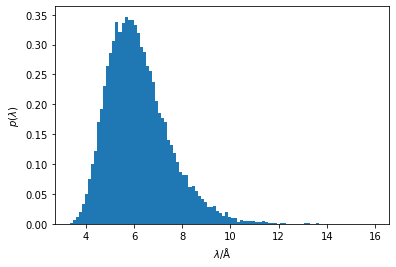

In [3]:
plt.hist(wavelength * 1e10, bins=100, density=True)
plt.xlabel('$\lambda$/Å')
plt.ylabel('$p(\lambda)$')
plt.show()

The presence of neutron guides mean that these neutrons are can be considered a beam propagating through space in the $z$-direction. 
These neutrons are then incident on a sample and scattered in the $x/y$-plane. 
Initially, making the assumption that all of the neutrons scatter from the same place, after scattering the neutrons move towards a detector under the influence of gravity.
The velocity magnitude, $\mathbf{v}$ is related to the wavelength by the follow, 

$$
\mathbf{v} = \frac{h}{m_n\lambda}, 
$$

where, $h$ is Planck's constant and $m_n$ is the neutron mass.

In [4]:
v = h / (neutron_mass * wavelength)

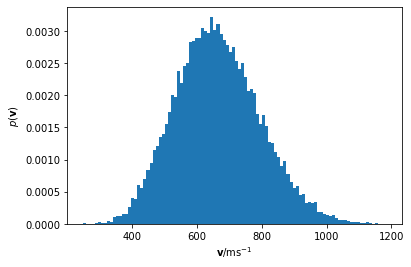

In [5]:
plt.hist(v, bins=100, density=True)
plt.xlabel('$\mathbf{v}$/ms$^{-1}$')
plt.ylabel('$p(\mathbf{v})$')
plt.show()

Since the neutrons are travelling as a beam propagating in a single ($z$-) dimension, $\mathbf{v} \approx v_z$.
Therefore, it is possible to calculate the time taken, $t$, for a neutron to travel from the sample position to the detector, $\bar{s}$, where $\bar{s}$ is a three-dimensional vector, $\bar{s}=[s_x, s_y, s_z]$, 

$$
t = \frac{s_z}{v_z}.
$$

Consider the sample at $(0, 0, 0)$ and all of the neutrons are detected at $(0.22, 1.00, 39.00)$ m (39 m is very long for a sample-to-detector distance, but it feasible (ie. this is the maximum for the D11 instrument at ILL). 

In [6]:
sample_position = np.array([0., 0., 0.])
detector_position = np.array([0.22, 1.00, 39.00])
s_bar = detector_position - sample_position
t = s_bar[2] / v

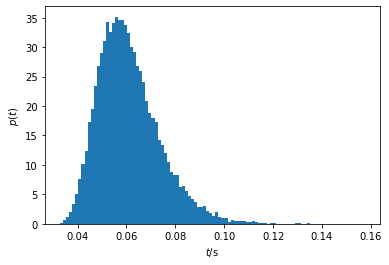

In [7]:
plt.hist(t, bins=100, density=True)
plt.xlabel('$t$/s')
plt.ylabel('$p(t)$')
plt.show()

The knowledge of $t$ allows the determination of the velocity in the $x$- and $y$- dimensions by rearranging the following kinematic equation of motion, 

$$
x(t) = x(0) + v(0)t + \frac{at^2}{2}.
$$

Which we write in using the vector notation above, 

$$
\bar{v}(0) = \frac{\bar{s} + \frac{1}{2}\bar{g} t^2}{t},
$$

where, $\bar{g}$ is the gravitional vector, $[0, 9.80665, 0]$ ms<sup>-2</sup>.

In [8]:
g_bar = np.array([0, g, 0])
v_bar0 = (s_bar + 0.5 * g_bar * t[:, np.newaxis] ** 2) / (t[:, np.newaxis])

Having found the initial velocity, it is possible to trace the trajectory of the neutrons, in each dimension as a function of time (here shown for half a second of travel of slowest neutron to emphasize the parabola).

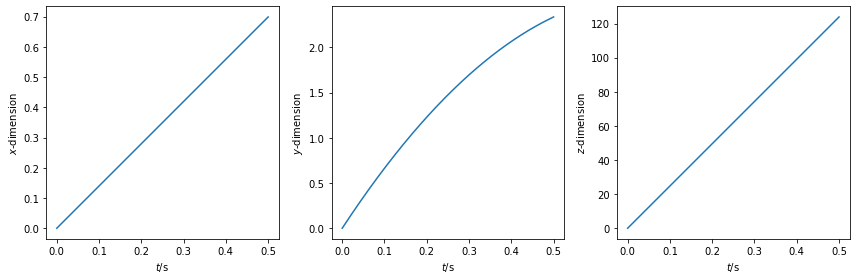

In [9]:
count = np.argmax(t)
t_range = np.linspace(0, 0.5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
labels = ['x', 'y', 'z']
for dim in [0, 1, 2]:
    x = sample_position[dim] + v_bar0[count, dim] * t_range - (g_bar[dim] * t_range ** 2) / 2
    ax[dim].plot(t_range, x)
    ax[dim].set_xlabel('$t$/s')
    ax[dim].set_ylabel(f'${labels[dim]}$-dimension')
plt.tight_layout()
plt.show()

It can be seen that, while the $x$- and $z$-dimension offer straight trajectories, the trajectories in the $y$-dimension is curved, due to gravity. 
This means that we can use the same mechanics, but remove gravity, to find where on the detector the neutrons would be detected. 

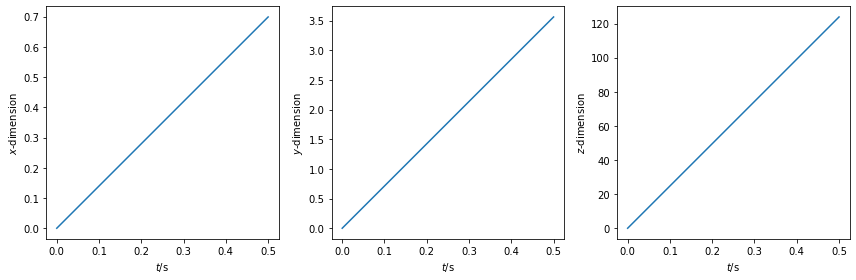

In [10]:
no_g_bar = np.array([0., 0., 0.])
count = np.argmax(t)
t_range = np.linspace(0, 0.5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
labels = ['x', 'y', 'z']
for dim in [0, 1, 2]:
    x = sample_position[dim] + v_bar0[count, dim] * t_range - (no_g_bar[dim] * t_range ** 2) / 2
    ax[dim].plot(t_range, x)
    ax[dim].set_xlabel('$t$/s')
    ax[dim].set_ylabel(f'${labels[dim]}$-dimension')
plt.tight_layout()
plt.show()

In [11]:
true_detector_y = sample_position[1] + v_bar0[count, 1] * t[count] - (no_g_bar[1] * t[count] ** 2) / 2
true_detector_y

1.1214985295875823

So for the slowest neutron in the distribution, the neutron should have been detector at position $(0.22, 1.12, 39.0)$ m if no gravity had been present. 

We can look at the impact this has on all of the neutrons in our distribution (assuming that they are all detected in the same place), as a function of wavelength.

In [12]:
true_detector_y = sample_position[1] + v_bar0[:, 1] * t - (no_g_bar[1] * t ** 2) / 2

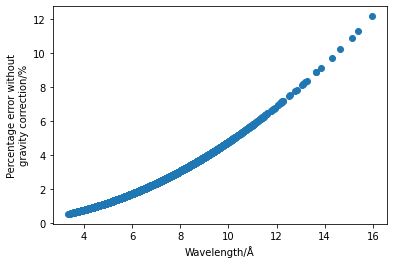

In [13]:
plt.plot(wavelength * 1e10, ((true_detector_y / detector_position[1])-1)*100, 'o')
plt.xlabel('Wavelength/Å')
plt.ylabel('Percentage error without\ngravity correction/%')
plt.show()